Subiectul I
1.

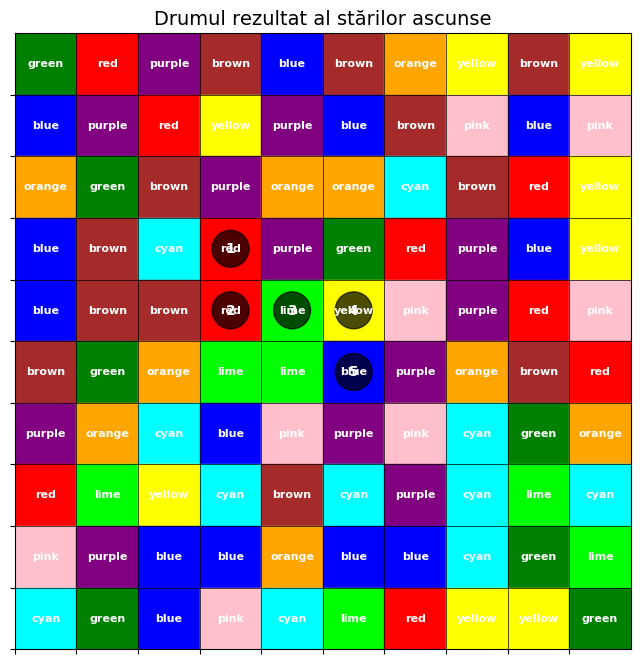

Log-probabilitate: -8.99961934066053
Drumul cel mai probabil: [(3, 3), (4, 3), (4, 4), (4, 5), (5, 5)]


In [14]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow", 
    "purple", "orange", "pink", "cyan", 
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))

for i, j in stari_ascunse:
    vecini = [
        (i - 1, j),
        (i + 1, j),
        (i, j - 1),
        (i, j + 1)
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    
    prob_stanga = 0.4 if (i, j - 1) in vecini_valizi else 0
    prob_rest = (1 - prob_stanga) / (len(vecini_valizi) - (1 if prob_stanga > 0 else 0))
    
    for vecin in vecini_valizi:
        if idx_to_stare[vecin] == (i, j - 1):  # stânga
            transitions[stare_to_idx[(i, j)], vecin] = prob_stanga
        else:  # restul
            transitions[stare_to_idx[(i, j)], vecin] = prob_rest

# Normalizăm matricea de tranziție
transitions = transitions / transitions.sum(axis=1, keepdims=True)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))

for i, j in stari_ascunse:
    culoare = grid_culori[i, j]
    emissions[stare_to_idx[(i, j)], culoare_to_idx[culoare]] = 1.0

# Modelul HMM
model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob_ = np.ones(numar_stari) / numar_stari
model.transmat_ = transitions
model.emissionprob_ = emissions

# Rulăm algoritmul Viterbi pentru secvența de observații
logprob, secventa_stari = model.decode(np.array(observatii_idx).reshape(-1, 1), algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

#rezultate
print("Log-probabilitate:", logprob)
print("Drumul cel mai probabil:", drum)


2. Daca eliminam posibbilatea ca agentul sa oia la stanga rezultatul ramane nemodificat deoarece in rezultatul de mai sus se poate observa ca drumul selectat nu are nici o schimbare de directie spre stanga.

Subiectul III

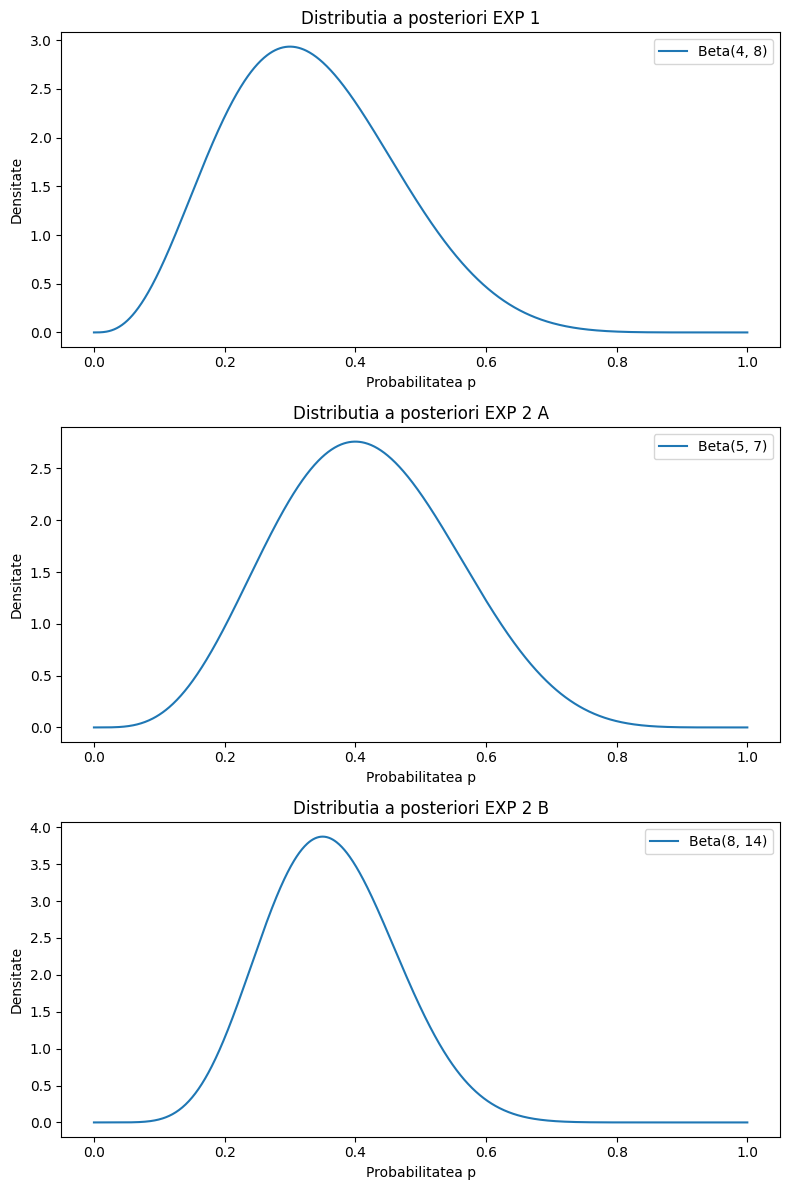

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#functie plot beta
def plot_beta(alpha, beta_param, title, ax):
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, alpha, beta_param)
    ax.plot(x, y, label=f"Beta({alpha}, {beta_param})")
    ax.set_title(title)
    ax.set_xlabel("Probabilitatea p")
    ax.set_ylabel("Densitate")
    ax.legend()

#exp 1 parametrii
alpha_prior_1, beta_prior_1 = 1, 1
heads_1, tails_1 = 3, 7 #pentru s s b b s s s s b s
alpha_post_1 = alpha_prior_1 + heads_1
beta_post_1 = beta_prior_1 + tails_1

#exp 2 caz A parametrii
heads_2, tails_2 = 4, 6 #pentru b b s b s s b s s b
alpha_post_2_case_A = alpha_prior_1 + heads_2
beta_post_2_case_A = beta_prior_1 + tails_2

#exp 2 caz B parametrii
alpha_post_2_case_B = alpha_post_1 + heads_2
beta_post_2_case_B = beta_post_1 + tails_2

#reprezentare grafica
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

plot_beta(alpha_post_1, beta_post_1, "Distributia a posteriori EXP 1", axs[0])
plot_beta(alpha_post_2_case_A, beta_post_2_case_A, 
          "Distributia a posteriori EXP 2 A", axs[1])
plot_beta(alpha_post_2_case_B, beta_post_2_case_B, 
          "Distributia a posteriori EXP 2 B", axs[2])

plt.tight_layout()
plt.show()
